3.Tratamento de dados
Nesta etapa inspecionamos como estão os registros de nosso dataset e realizamos tratamento para utilizar os dados.

In [1]:
import pandas as pd
import requests
import base64
import seaborn as sns
import matplotlib.pyplot as plt

Importando Dataset 'spotify_dataset_BR_US_MX.xlsx'

In [2]:
df = pd.read_excel('spotify_dataset_BR_US_MX.xlsx')

In [57]:
# Convertendo tipo de coluna track_name para str para conseguir aagrupar com as colunas restantes
df['track_name'] = df['track_name'].astype(str)

As musicas mais populares no momento nos mercados BR,EUA e MX

In [56]:

all_tracks_sorted_by_popularity_market = df.groupby(['track_name','artist_name','market'])['popularity'].mean().sort_values(ascending=False).reset_index()
all_tracks_sorted_by_popularity_market.head(20)

,track_name,artist_name,market,popularity
0,BIRDS OF A FEATHER,Billie Eilish,BR,99.0
1,BIRDS OF A FEATHER,Billie Eilish,US,99.0
2,BIRDS OF A FEATHER,Billie Eilish,MX,99.0
3,Espresso,Sabrina Carpenter,BR,99.0
4,Espresso,Sabrina Carpenter,US,99.0
5,Espresso,Sabrina Carpenter,MX,99.0
6,Please Please Please,Sabrina Carpenter,US,98.0
7,Please Please Please,Sabrina Carpenter,BR,98.0
8,Please Please Please,Sabrina Carpenter,MX,98.0
9,Not Like Us,Kendrick Lamar,US,97.0


Durante análise dos dados do dataframe, foi obserado alguns campos vazios, como eram poucos, não impactando nas análises a serem feitas, foi realizado dropna nesses valores.

In [12]:

df.isnull().sum()

Unnamed: 0             0
track_id               0
track_name             7
track_duration_ms      5
artist_name            5
album_name             8
album_release_date    20
popularity            20
genre                 20
market                20
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Unnamed: 0            0
track_id              0
track_name            0
track_duration_ms     0
artist_name           0
album_name            0
album_release_date    0
popularity            0
genre                 0
market                0
dtype: int64


Exportando dataset pós tratamento

In [ ]:

df.to_excel('cleaned_spotify_dataset_BR_US_MX.xlsx')
df.head()

4. Exploração de dados através de perguntas

Para descobrir os dados referente a um unico cantor, como por exemplo Post Malone, realizamos filtro abaixco

In [15]:

post_tracks = df[df['artist_name'] == 'Post Malone']
post_tracks

,Unnamed: 0,track_id,track_name,track_duration_ms,artist_name,album_name,album_release_date,popularity,genre,market
9276,9276,21jGcNKet2qwijlDFuPiPb,Circles,215280.0,Post Malone,Hollywood's Bleeding,2019-09-06 00:00:00,85.0,pop,BR
9308,9308,7221xIgOnuakPdLqT0F3nP,I Had Some Help (Feat. Morgan Wallen),178205.0,Post Malone,I Had Some Help,2024-05-10 00:00:00,95.0,pop,BR
9425,9425,5crxqqibcvoOQQgg4HjAFQ,Guy For That (Feat. Luke Combs),164011.0,Post Malone,Guy For That,2024-07-26 00:00:00,79.0,pop,BR
9426,9426,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),218146.0,Post Malone,beerbongs & bentleys,2018-04-27 00:00:00,81.0,pop,BR
9485,9485,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,157560.0,Post Malone,Hollywood's Bleeding,2019-09-06 00:00:00,84.0,pop,BR
9511,9511,3a1lNhkSLSkpJE4MSHpDu9,Congratulations,220293.0,Post Malone,Stoney (Deluxe),2016-12-09 00:00:00,80.0,pop,BR
9892,9892,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,158040.0,Post Malone,Spider-Man: Into the Spider-Verse (Soundtrack ...,2018-12-14 00:00:00,81.0,pop,BR
9913,9913,7dt6x5M1jzdTEt8oCbisTK,Better Now,231266.0,Post Malone,beerbongs & bentleys,2018-04-27 00:00:00,79.0,pop,BR
24000,24000,7221xIgOnuakPdLqT0F3nP,I Had Some Help (Feat. Morgan Wallen),178205.0,Post Malone,I Had Some Help,2024-05-10 00:00:00,95.0,pop,US
24022,24022,5ZLL6wYXeqg0k35ZkDRfhZ,Pour Me A Drink (Feat. Blake Shelton),195122.0,Post Malone,Pour Me A Drink,2024-06-21 00:00:00,85.0,pop,US


Por curiosidade, escolhi um cantor para observar popularidade entre os mercados. Para isso, foi realizado filtro para identificar as musicas mais populares do momento de Post Malone por Mercado.
Vale dizer que o atributo popularity se refere a apenas um recorte do momento, ele é apenas um indicador atual

In [16]:


Post_tracks_sorted = post_tracks.sort_values(by=['market','popularity'], ascending= False)
Post_tracks_sorted

,Unnamed: 0,track_id,track_name,track_duration_ms,artist_name,album_name,album_release_date,popularity,genre,market
24000,24000,7221xIgOnuakPdLqT0F3nP,I Had Some Help (Feat. Morgan Wallen),178205.0,Post Malone,I Had Some Help,2024-05-10 00:00:00,95.0,pop,US
24022,24022,5ZLL6wYXeqg0k35ZkDRfhZ,Pour Me A Drink (Feat. Blake Shelton),195122.0,Post Malone,Pour Me A Drink,2024-06-21 00:00:00,85.0,pop,US
24082,24082,21jGcNKet2qwijlDFuPiPb,Circles,215280.0,Post Malone,Hollywood's Bleeding,2019-09-06 00:00:00,85.0,pop,US
24108,24108,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,157560.0,Post Malone,Hollywood's Bleeding,2019-09-06 00:00:00,84.0,pop,US
24321,24321,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),218146.0,Post Malone,beerbongs & bentleys,2018-04-27 00:00:00,81.0,pop,US
24427,24427,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,158040.0,Post Malone,Spider-Man: Into the Spider-Verse (Soundtrack ...,2018-12-14 00:00:00,81.0,pop,US
24241,24241,3a1lNhkSLSkpJE4MSHpDu9,Congratulations,220293.0,Post Malone,Stoney (Deluxe),2016-12-09 00:00:00,80.0,pop,US
24064,24064,5crxqqibcvoOQQgg4HjAFQ,Guy For That (Feat. Luke Combs),164011.0,Post Malone,Guy For That,2024-07-26 00:00:00,79.0,pop,US
24268,24268,7xQAfvXzm3AkraOtGPWIZg,Wow.,149546.0,Post Malone,Hollywood's Bleeding,2019-09-06 00:00:00,79.0,pop,US
24395,24395,5w40ZYhbBMAlHYNDaVJIUu,Chemical,184013.0,Post Malone,Chemical,2023-04-14 00:00:00,79.0,pop,US


Histograma contendo a variação de atributo popularity

<Axes: >

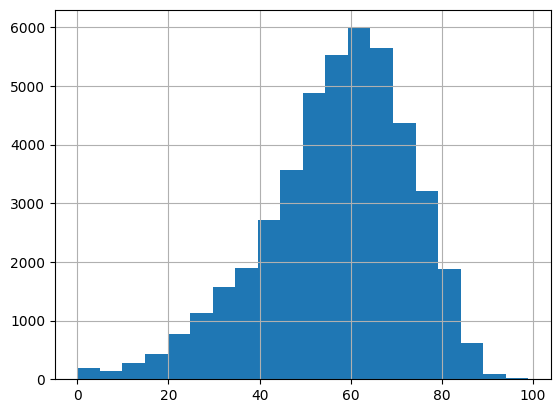

In [17]:

df_cleaned = pd.read_excel('cleaned_spotify_dataset_BR_US_MX.xlsx')
df_cleaned['popularity'].hist(bins=20)

Como a popularidade varia entre os gêneros?

<Axes: xlabel='genre'>

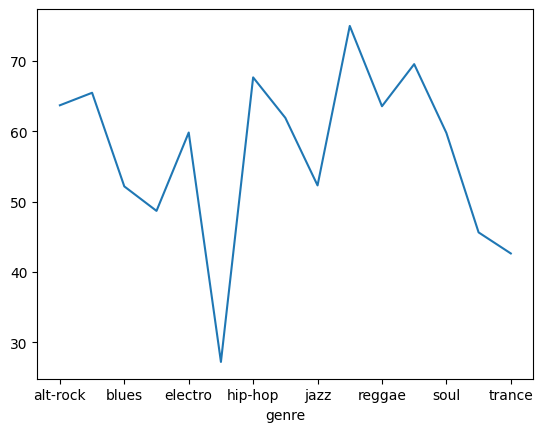

In [18]:

popularity_by_genre = df_cleaned.groupby('genre')['popularity'].mean()
popularity_by_genre.plot()

#média de popularidade de genero por mercado. Como os diferentes genêros se comportam entre os mercados?

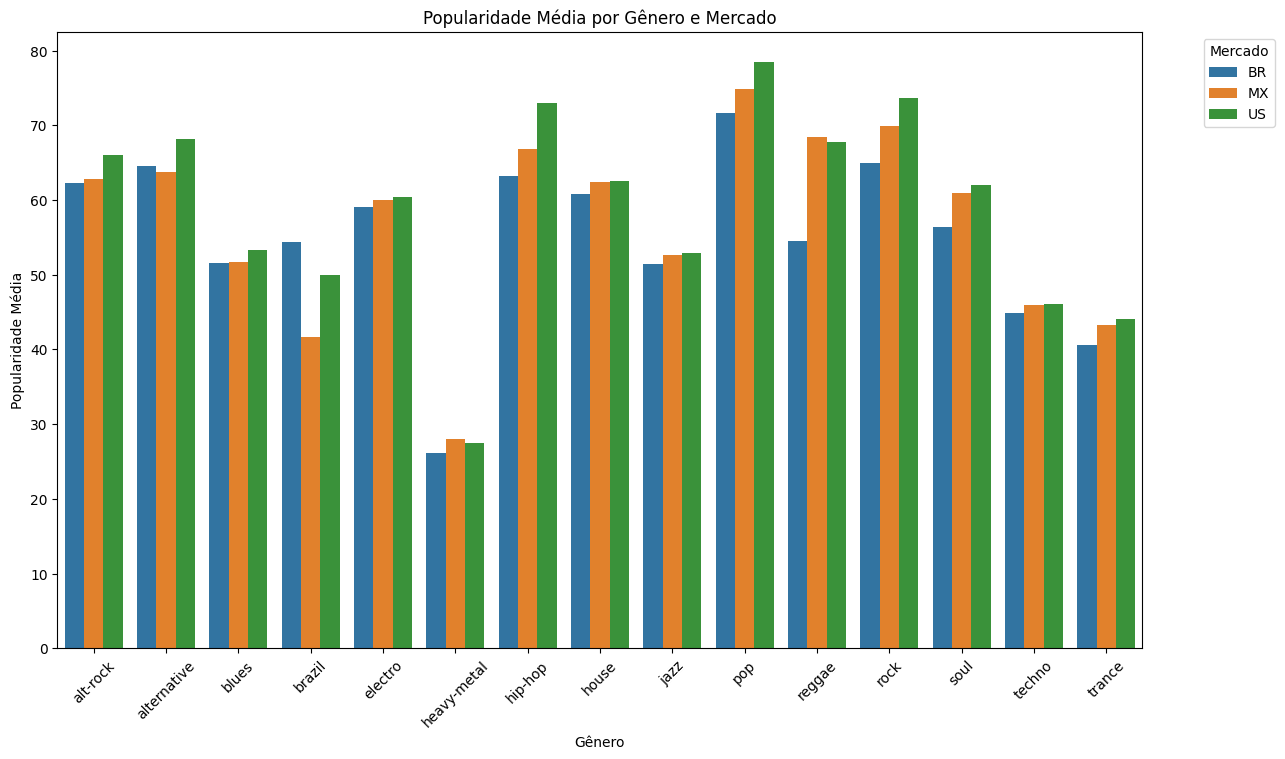

In [19]:

popularity_by_market_by_genre = df.groupby(['market','genre'])['popularity'].mean().reset_index()


plt.figure(figsize=(14, 8))
sns.barplot(x='genre', y='popularity', hue='market', data=popularity_by_market_by_genre)
plt.title('Popularidade Média por Gênero e Mercado')
plt.xlabel('Gênero')
plt.ylabel('Popularidade Média')
plt.legend(title='Mercado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Quem são os 10 artistas mais populares entre os mercados?

In [21]:

df_artists_popularity = df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False)
df_artists_popularity.head(10)

artist_name
LISA                 93.000000
Djo                  93.000000
Myles Smith          93.000000
Mark Ambor           91.000000
Sabrina Carpenter    90.533333
Tom Odell            88.000000
a-ha                 88.000000
ILLIT                88.000000
Jung Kook            87.400000
David Kushner        86.000000
Name: popularity, dtype: float64

Se segregarmos por mercado, observamos artistas diferentes?

In [31]:

df_artists_popularity_by_market = df.groupby(['market','artist_name'])['popularity'].mean().sort_values(ascending=False).reset_index()
df_artists_popularity_by_market.head(10)

,market,artist_name,popularity
0,BR,Sabrina Carpenter,93.5
1,MX,Sabrina Carpenter,93.5
2,MX,Djo,93.0
3,US,Myles Smith,93.0
4,BR,Djo,93.0
5,BR,Myles Smith,93.0
6,MX,Chappell Roan,93.0
7,US,Djo,93.0
8,BR,LISA,93.0
9,MX,Myles Smith,93.0


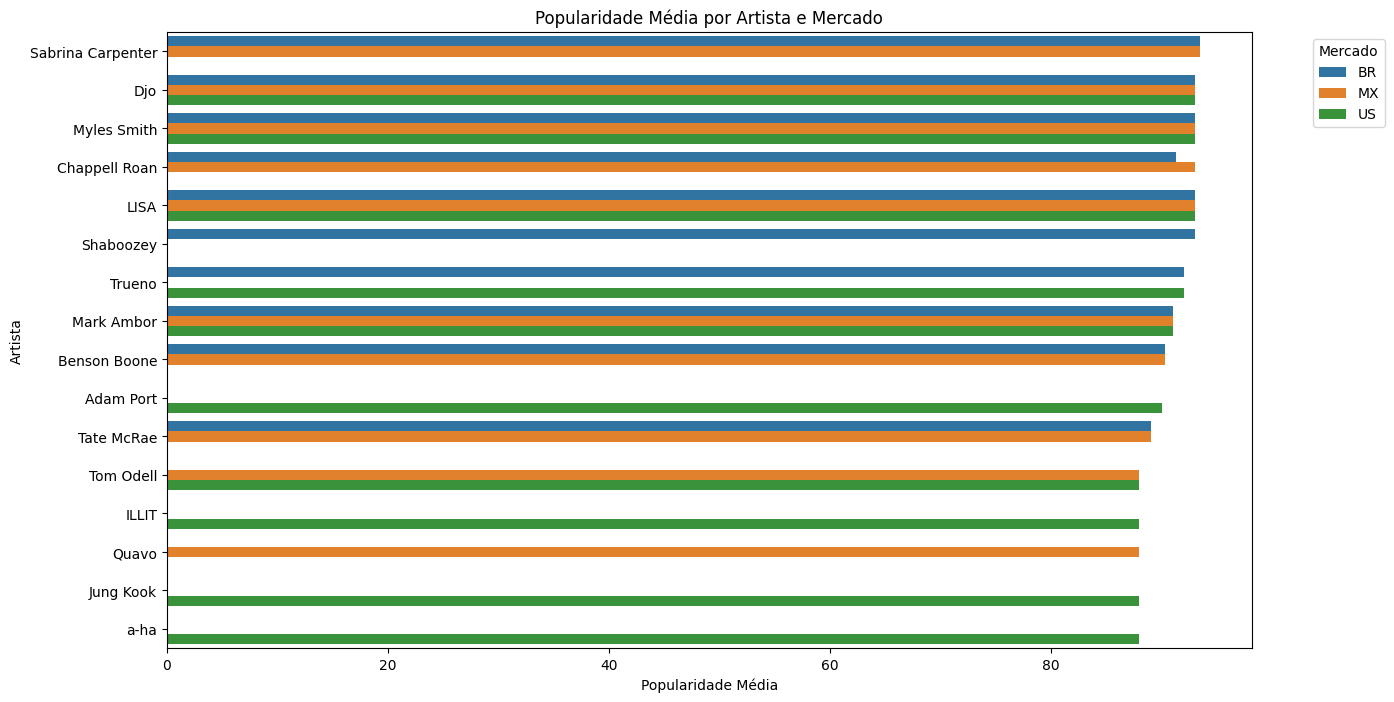

In [34]:
df_top_artists_by_market = df_artists_popularity_by_market.groupby('market').head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x='popularity', y='artist_name', hue='market', data=df_top_artists_by_market, dodge=True)
plt.title('Popularidade Média por Artista e Mercado')
plt.xlabel('Popularidade Média')
plt.ylabel('Artista')
plt.legend(title='Mercado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Se observamos proporcionalmente, como a popularidade de artista por mercado se comporta?
É interessante ver como o cantor Jung Kook não é top market em México e Brasil, apesar de ser nos EUA, por exemplo.

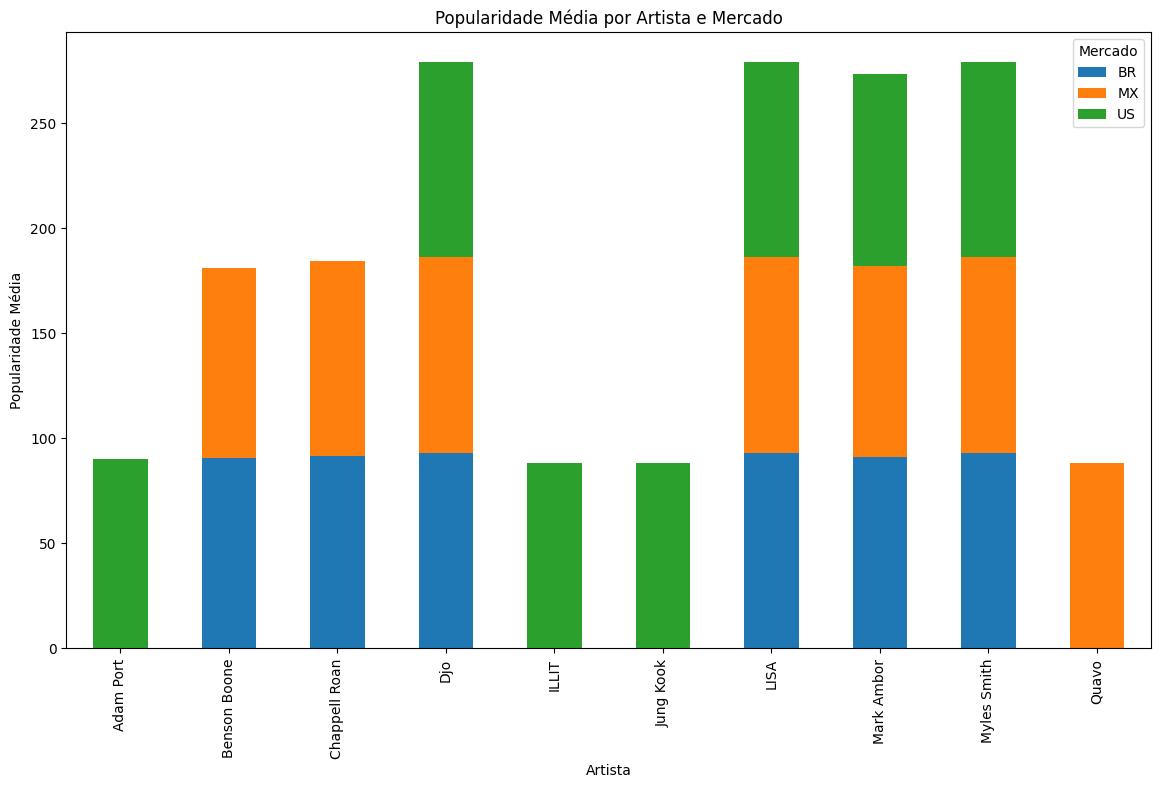

In [36]:

df_pivot = df_top_artists_by_market.pivot(index='artist_name', columns='market', values='popularity').head(10)
df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Popularidade Média por Artista e Mercado')
plt.xlabel('Artista')
plt.ylabel('Popularidade Média')
plt.legend(title='Mercado')
plt.show()
